# **Estação metereológica CRHEA**

*   **Nome:** CRHEA
*   **Tipo:** Meteorológica
*   **Data da instalação:**
*   **Local da instalação:** CRHEA
*   **Bacia:**
*   **Latitude:** 22 01'22"S (-22.022777777778)
*   **Longitude:** 43 57'38"W (-43.960555555556)
*   **Altitude:** 733m
*   **Cobertura do solo:** Pasto

# Coleta de Dados

Esse dataset possui as leituras automáticas realizadas no período de **01/01/1980 à 30/09/2025**

In [1]:
# Montagem do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importação de bibliotecas Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho para o arquivo no Google Drive
caminho_arquivo = "/content/drive/MyDrive/datasets/CRHEA/CRHEA_1980-2025.xls"
df = pd.read_excel(caminho_arquivo)

# Criando variáveis de data, precipitação e temperatura média
coluna_data = 'data'
coluna_precipitacao = 'rain'
coluna_temperatura_media = 'tmean'

df

,mm,yr,doy,tmax,tmin,tmean,tdavg,Wtmax,Wtmin,wsp05,wsp2,wsp10,evapA,evapS,rain,rad,insol,press,rh,piche
0,2015-01-01 00:00:00,1980,1,26,17.6,21.8,22.1,*******,*******,*******,*******,*******,4.26,*******,0,370.18,05:00:00,********,69,NaN
1,2015-01-02 00:00:00,1980,2,25.8,14.8,20.3,21.8,34,15,5.92,7.12,*******,*******,*******,0,600.29,11:20:00,********,59.25,NaN
2,2015-01-03 00:00:00,1980,3,27.2,13.2,20.2,22.4,28,12,3.36,3.57,*******,7.12,*******,0,610.29,11:50:00,********,42.5,NaN
3,2015-01-04 00:00:00,1980,4,30.2,11.4,20.8,24,31,12,*******,*******,*******,6.98,*******,0,600.29,11:10:00,********,47.25,NaN
4,2015-01-05 00:00:00,1980,5,31,14.2,22.6,25.2,*******,*******,*******,*******,*******,6.98,*******,0,600.29,09:05:00,********,50.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,2011-09-26 00:00:00,2025,269,27.1,12.1,19.6,20.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,321.800544,NaN,933.4,68.5,NaN
16706,2011-09-27 00:00:00,2025,270,30.3,14.9,22.6,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,334.042956,NaN,931.3,59,NaN
16707,2011-09-28 00:00:00,2025,271,33.7,18,25.85,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,321.800544,NaN,929.4,48.5,NaN
16708,2011-09-29 00:00:00,2025,272,34.4,17.9,26.15,25.72,35.2,17.2,1.42,1.95,5.75,3.54,3.5,0,319.468656,08:30:00,927.8,57.5,NaN


# Dicionário e estrutura do conjunto de dados

Nesse banco de dados existem **20 variáveis**, com **16.710 leituras**, nas quais são:

* **mm:** data e hora da leitura
* **yr:** ano da leitura
* **doy:** número sequencial do dia do ano
* **tmax:** temperatura máxima do ar em graus celsius (C)
* **tmin:** temperatura mínima do ar em graus celsius (C)
* **tmean:** temperatura média do ar em graus celsius (C)
* **tdavg:**
* **Wtmax:**
* **Wtmin:**
* **wsp05:**
* **wsp2:**
* **wsp10:**
* **evapA:**
* **evapS:**
* **rain:** precipitação em milímetros (mm)
* **rad:** radiação média em kW/m^2
* **insol:**
* **press:** pressão média em milibar (mbar)
* **rh:** umidade relativa em porcentagem (%)
* **piche:**

**Importante:** as leituras são diárias.

In [3]:
# Cria a coluna de data com base no ano e doy (dia sequencial do ano)
df[coluna_data] = pd.to_datetime(df["yr"].astype(str) + df["doy"].astype(str).str.zfill(3), format="%Y%j")

# Seta a coluna de data como índice
df = df.set_index(coluna_data)

# Ordena por data
df = df.sort_values(coluna_data)

df

,mm,yr,doy,tmax,tmin,tmean,tdavg,Wtmax,Wtmin,wsp05,wsp2,wsp10,evapA,evapS,rain,rad,insol,press,rh,piche
data,,,,,,,,,,,,,,,,,,,,
1980-01-01,2015-01-01 00:00:00,1980,1,26,17.6,21.8,22.1,*******,*******,*******,*******,*******,4.26,*******,0,370.18,05:00:00,********,69,NaN
1980-01-02,2015-01-02 00:00:00,1980,2,25.8,14.8,20.3,21.8,34,15,5.92,7.12,*******,*******,*******,0,600.29,11:20:00,********,59.25,NaN
1980-01-03,2015-01-03 00:00:00,1980,3,27.2,13.2,20.2,22.4,28,12,3.36,3.57,*******,7.12,*******,0,610.29,11:50:00,********,42.5,NaN
1980-01-04,2015-01-04 00:00:00,1980,4,30.2,11.4,20.8,24,31,12,*******,*******,*******,6.98,*******,0,600.29,11:10:00,********,47.25,NaN
1980-01-05,2015-01-05 00:00:00,1980,5,31,14.2,22.6,25.2,*******,*******,*******,*******,*******,6.98,*******,0,600.29,09:05:00,********,50.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-26,2011-09-26 00:00:00,2025,269,27.1,12.1,19.6,20.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,321.800544,NaN,933.4,68.5,NaN
2025-09-27,2011-09-27 00:00:00,2025,270,30.3,14.9,22.6,77.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,334.042956,NaN,931.3,59,NaN
2025-09-28,2011-09-28 00:00:00,2025,271,33.7,18,25.85,26.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,321.800544,NaN,929.4,48.5,NaN


# Análise descritiva univariada das variáveis

In [4]:
# Tipos de cada variável
df.dtypes

,0
mm,object
yr,int64
doy,int64
tmax,object
tmin,object
tmean,object
tdavg,object
Wtmax,object
Wtmin,object
wsp05,object


In [5]:
# Dimensões do DataFrame
print(f'CONJUNTO DE DADOS \nVariáveis: \t{df.shape[1]} \Leituras: \t{df.shape[0]}\n')

CONJUNTO DE DADOS 
Variáveis: 	20 \Leituras: 	16710



In [6]:
df.describe()

,yr,doy,piche
count,16710.000000,16710.000000,3261.000000
mean,2002.377858,182.471454,4.634722
std,13.208018,105.254986,2.232134
min,1980.000000,1.000000,0.200000
25%,1991.000000,91.000000,3.000000
50%,2002.000000,182.000000,4.500000
75%,2014.000000,273.000000,6.000000
max,2025.000000,366.000000,15.900000


In [7]:
# Exportação do dataframe com os dados tratados para csv
df.to_csv('/content/drive/MyDrive/datasets/CRHEA/dados_crhea_tratados_011980_092025.csv')

In [8]:
# Selecionando apenas as colunas de interesse, precipitação e temperatura média em um novo dataframe
data = df[[coluna_precipitacao, coluna_temperatura_media]].copy()

data

,rain,tmean
data,,
1980-01-01,0,21.8
1980-01-02,0,20.3
1980-01-03,0,20.2
1980-01-04,0,20.8
1980-01-05,0,22.6
...,...,...
2025-09-26,0,19.6
2025-09-27,0,22.6
2025-09-28,0,25.85


# Tratamento de valores faltantes

In [9]:
# Conversão de valores para numérico, transformando '*******' e outros erros em NaN
data = data.replace('*******', np.nan)
data = data.apply(pd.to_numeric, errors='coerce')

In [10]:
# Substitui valores vazios ou espaços em branco por NaN
data[coluna_precipitacao] = data[coluna_precipitacao].replace(r'^\s*$', np.nan, regex=True)
data[coluna_temperatura_media] = data[coluna_temperatura_media].replace(r'^\s*$', np.nan, regex=True)

# Converte para numérico e define não numéricos como NaN
data[coluna_precipitacao] = pd.to_numeric(data[coluna_precipitacao], errors='coerce')
data[coluna_temperatura_media] = pd.to_numeric(data[coluna_temperatura_media], errors='coerce')

# Define a precipitação como NaN se a temperatura também for NaN, ou seja, não houve leitura naquele dia
data.loc[data[coluna_temperatura_media].isna(), coluna_precipitacao] = np.nan

In [11]:
# Dados ausentes
data.isnull().sum()

,0
rain,275
tmean,217


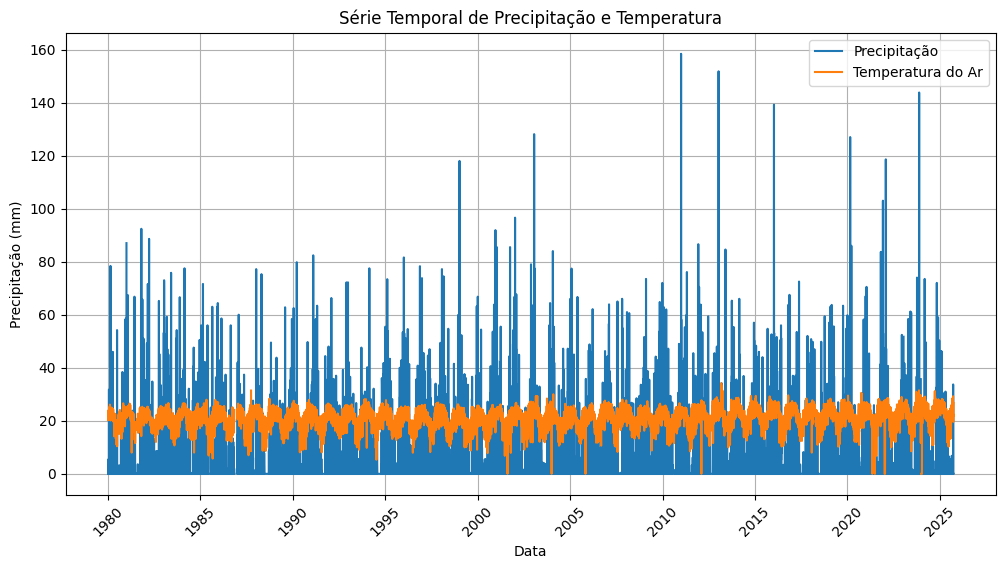

In [12]:
# Gráfico com leituras diárias de precipitação e temperatura
plt.figure(figsize=(12,6))
plt.plot(data.index, data[coluna_precipitacao], label="Precipitação")
plt.plot(data.index, data[coluna_temperatura_media], label="Temperatura do Ar")

# Adiciona título e rótulos
plt.title("Série Temporal de Precipitação e Temperatura")
plt.xlabel("Data")
plt.ylabel("Precipitação (mm)")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

## Dados faltantes de precipitação

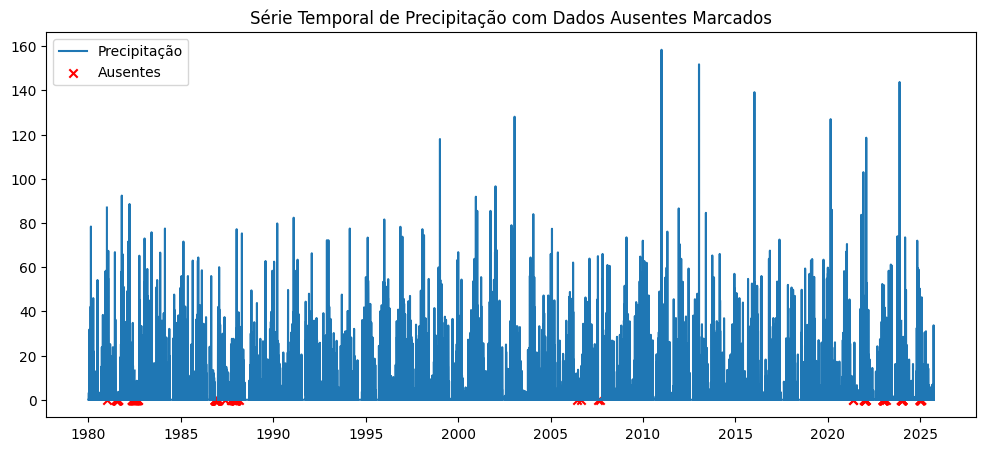

In [13]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(data.index, data[coluna_precipitacao], label='Precipitação')
plt.scatter(data.index[data[coluna_precipitacao].isna()], [0]*data[coluna_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal de Precipitação com Dados Ausentes Marcados')
plt.show()



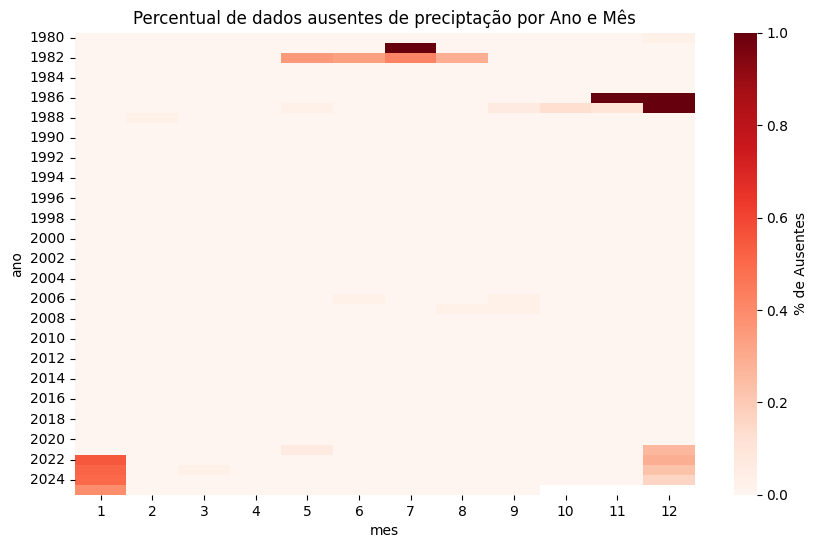

In [14]:
# Tabela ano x mês, contando valores ausentes
data['ano'] = data.index.year
data['mes'] = data.index.month
pivot = data.pivot_table(values=coluna_precipitacao, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
plt.title('Percentual de dados ausentes de preciptação por Ano e Mês')
plt.show()


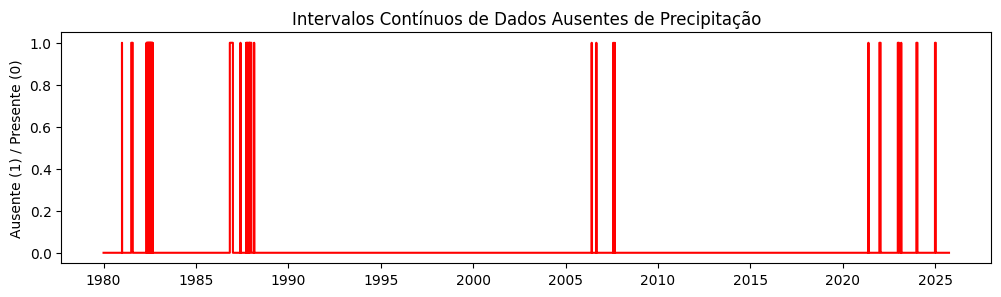

In [15]:
# Gráfico com intervalos contínuos de dados ausentes de precipitação
is_na = data[coluna_precipitacao].isna()
plt.figure(figsize=(12,3))
plt.plot(data.index, is_na, drawstyle='steps-mid', color='red')
plt.title('Intervalos Contínuos de Dados Ausentes de Precipitação')
plt.ylabel('Ausente (1) / Presente (0)')
plt.show()


## Dados faltantes de temperatura

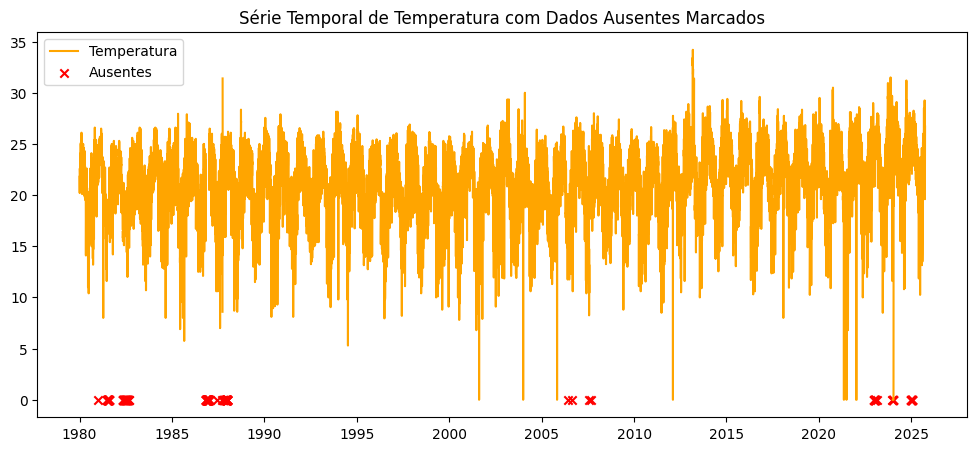

In [16]:
# Gráfico com leituras diárias de temperatura média e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(data.index, data[coluna_temperatura_media], label='Temperatura', color="orange")
plt.scatter(data.index[data[coluna_temperatura_media].isna()], [0]*data[coluna_temperatura_media].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal de Temperatura com Dados Ausentes Marcados')
plt.show()


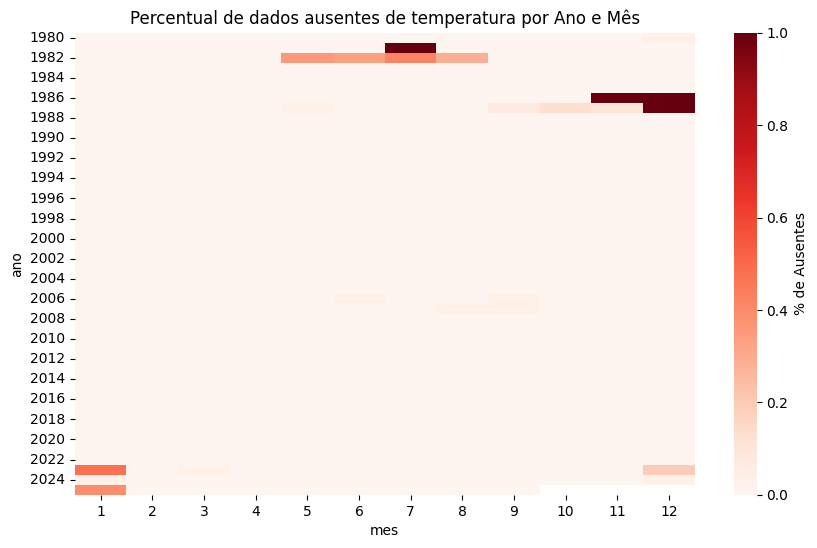

In [17]:
# Tabela ano x mês, contando valores ausentes
data['ano'] = data.index.year
data['mes'] = data.index.month
pivot = data.pivot_table(values=coluna_temperatura_media, index='ano', columns='mes',
                       aggfunc=lambda x: x.isna().mean())

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Reds', cbar_kws={'label': '% de Ausentes'})
plt.title('Percentual de dados ausentes de temperatura por Ano e Mês')
plt.show()

# Preenchimento dos dados faltantes com o cunjunto de dados ERA5

## Precipitação

In [18]:
# Dados ERA5
caminho_arquivo = "/content/drive/MyDrive/datasets/ERA5/serie_tp_era_5_area_dados_faltantes_crhea.csv"

df_dados_era5_precipitacao = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Ordena por data
df_dados_era5_precipitacao = df_dados_era5_precipitacao.sort_values("valid_time")

# Agregação diária com acumulado somado
df_dados_era5_precipitacao = df_dados_era5_precipitacao.resample("D").agg({
    "tp": "sum",
    "tp_mm": "sum",
})

df_dados_era5_precipitacao

,tp,tp_mm
valid_time,,
1980-01-01,0.026527,26.527405
1980-01-02,0.003768,3.768325
1980-01-03,0.000257,0.256777
1980-01-04,0.000038,0.038266
1980-01-05,0.000349,0.348806
...,...,...
2025-10-15,0.000706,0.705779
2025-10-16,0.000047,0.047237
2025-10-17,0.000772,0.771992


In [19]:
# Preenchimento dos dados faltantes de precipitação da estação do CRHEA com dados mensais acumulado da ERA5
data[coluna_precipitacao] = data[coluna_precipitacao].fillna(df_dados_era5_precipitacao["tp_mm"])

data

,rain,tmean,ano,mes
data,,,,
1980-01-01,0.0,21.80,1980,1
1980-01-02,0.0,20.30,1980,1
1980-01-03,0.0,20.20,1980,1
1980-01-04,0.0,20.80,1980,1
1980-01-05,0.0,22.60,1980,1
...,...,...,...,...
2025-09-26,0.0,19.60,2025,9
2025-09-27,0.0,22.60,2025,9
2025-09-28,0.0,25.85,2025,9


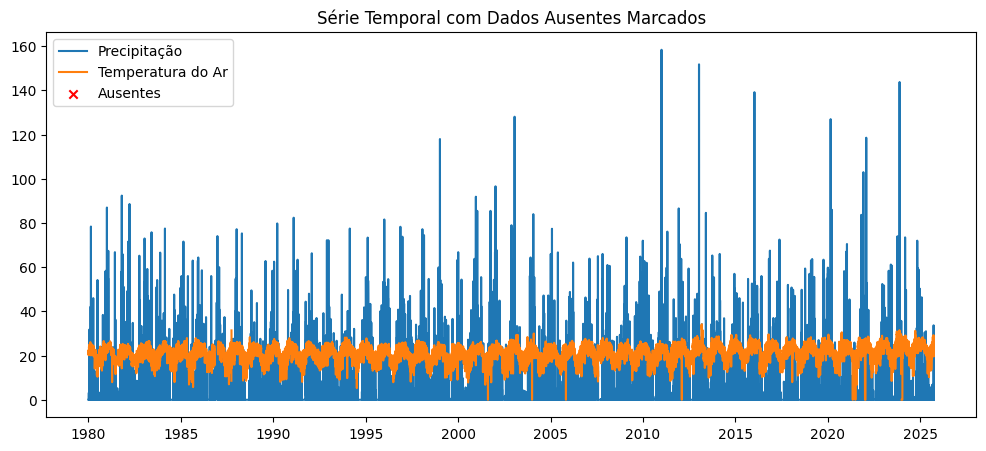

In [20]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(data.index, data[coluna_precipitacao], label='Precipitação')
plt.plot(data.index, data[coluna_temperatura_media], label="Temperatura do Ar")
plt.scatter(data.index[data[coluna_precipitacao].isna()], [0]*data[coluna_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()

In [21]:
# Dados ausentes
data.isnull().sum()

,0
rain,0
tmean,217
ano,0
mes,0


## Temperatura



In [22]:
# Dados ERA5
caminho_arquivo = "/content/drive/MyDrive/datasets/ERA5/serie_temp_era5_area_dados_faltantes_crhea.csv"

df_dados_era5_temperatura = pd.read_csv(caminho_arquivo, parse_dates=True, index_col=0)

# Ordena por data
df_dados_era5_temperatura = df_dados_era5_temperatura.sort_values("valid_time")

# Agregação diária com média mensal
df_dados_era5_temperatura = df_dados_era5_temperatura.resample("D").agg({
    "t2m": "mean",
    "t2m_celsius": "mean",
})

df_dados_era5_temperatura

,t2m,t2m_celsius
valid_time,,
1980-01-01,291.918609,18.768616
1980-01-02,290.421734,17.271739
1980-01-03,292.158295,19.008301
1980-01-04,292.965850,19.815857
1980-01-05,293.791047,20.641052
...,...,...
2025-10-15,292.555125,19.405131
2025-10-16,294.909048,21.759053
2025-10-17,295.667754,22.517761


In [23]:
# Preenchimento dos dados faltantes de temperatura da estação do CRHEA com médias mensais da ERA5
data[coluna_temperatura_media] = data[coluna_temperatura_media].fillna(df_dados_era5_temperatura["t2m_celsius"])

data

,rain,tmean,ano,mes
data,,,,
1980-01-01,0.0,21.80,1980,1
1980-01-02,0.0,20.30,1980,1
1980-01-03,0.0,20.20,1980,1
1980-01-04,0.0,20.80,1980,1
1980-01-05,0.0,22.60,1980,1
...,...,...,...,...
2025-09-26,0.0,19.60,2025,9
2025-09-27,0.0,22.60,2025,9
2025-09-28,0.0,25.85,2025,9


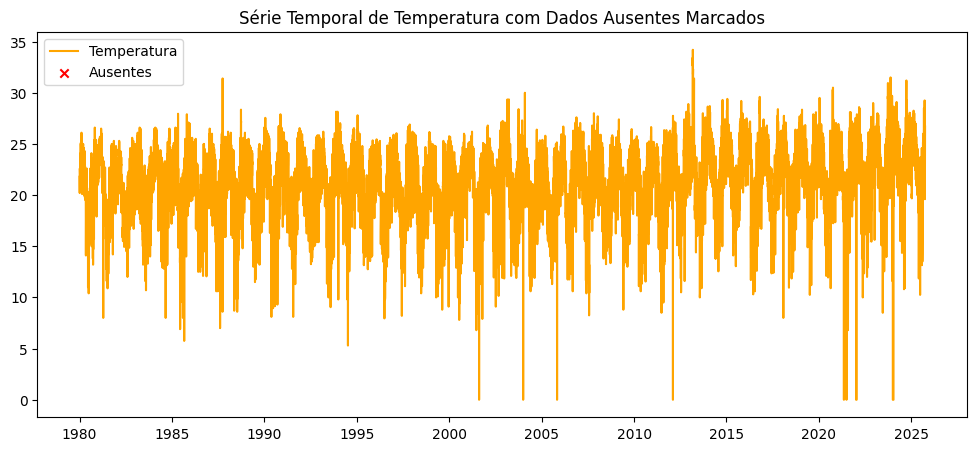

In [24]:
# Gráfico com leituras diárias de temperatura média e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(data.index, data[coluna_temperatura_media], label='Temperatura', color="orange")
plt.scatter(data.index[data[coluna_temperatura_media].isna()], [0]*data[coluna_temperatura_media].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal de Temperatura com Dados Ausentes Marcados')
plt.show()

In [25]:
# Dados ausentes
data.isnull().sum()

,0
rain,0
tmean,0
ano,0
mes,0


## Arquivo CSV com agregação diária

Salva arquivo CSV com dados de precipitação e temperatura média agregados diariamente.

In [26]:
data.to_csv('/content/drive/MyDrive/datasets/CRHEA/dados_crhea_agregados_diariamente_011980_a_092025.csv')

# Agregação Mensal para Previsão Futura

In [27]:
# Agregando a precipitação diária para a soma Mensal e temperatura para a média mensal ('MS' - Month Start)
df_mensal = data.resample('MS').agg({
    coluna_precipitacao: 'sum',
    coluna_temperatura_media: 'mean',
})

# Remover quaisquer meses incompletos (e.g., o último mês do dataset)
df_mensal = df_mensal.dropna()

df_mensal

,rain,tmean
data,,
1980-01-01,131.6,22.635484
1980-02-01,263.0,23.268966
1980-03-01,90.2,23.851613
1980-04-01,133.4,21.406667
1980-05-01,11.4,19.470968
...,...,...
2025-05-01,3.6,20.877419
2025-06-01,53.0,19.728544
2025-07-01,11.0,18.451613


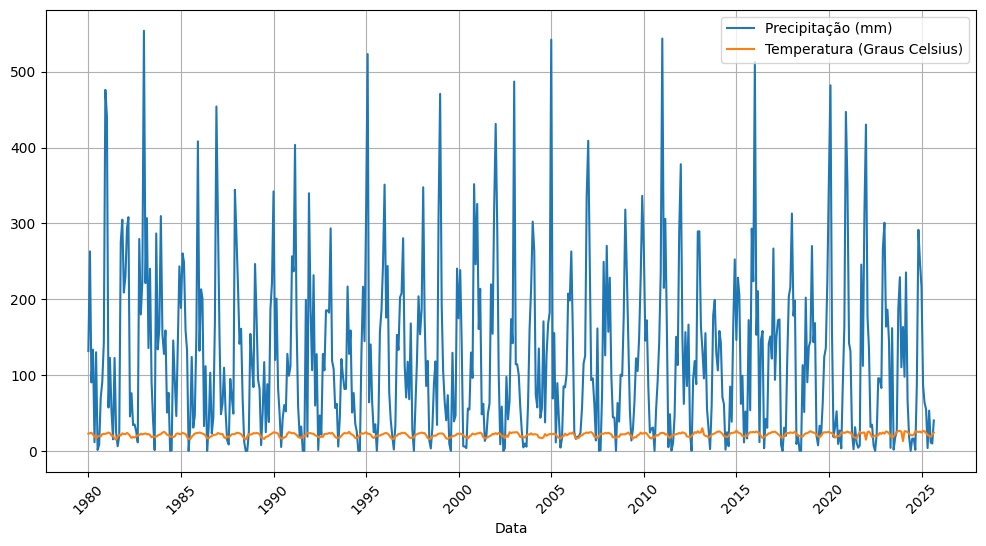

In [28]:
# Cria o gráfico de precipitação mensal
plt.figure(figsize=(12,6))
plt.plot(df_mensal.index, df_mensal[coluna_precipitacao], label="Precipitação (mm)")
plt.plot(df_mensal.index, df_mensal[coluna_temperatura_media], label="Temperatura (Graus Celsius)")

# Adiciona título e rótulos
#plt.title("Série Temporal de Precipitação e Temperatura Mensal")
plt.xlabel("Data")
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()

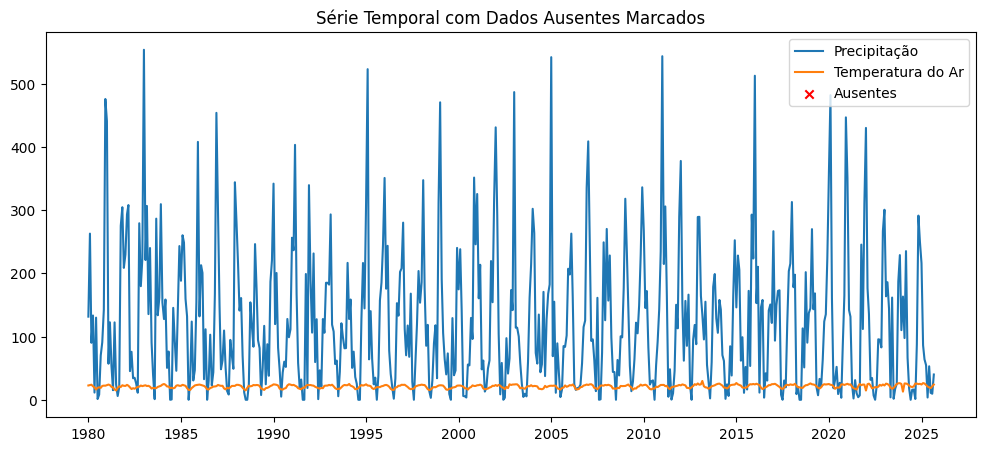

In [29]:
# Gráfico com leituras diárias de precipitação e com marcação dos dados ausentes
plt.figure(figsize=(12,5))
plt.plot(df_mensal.index, df_mensal[coluna_precipitacao], label='Precipitação')
plt.plot(df_mensal.index, df_mensal[coluna_temperatura_media], label="Temperatura do Ar")
plt.scatter(df_mensal.index[df_mensal[coluna_precipitacao].isna()], [0]*df_mensal[coluna_precipitacao].isna().sum(),
            color='red', label='Ausentes', marker='x')
plt.legend()
plt.title('Série Temporal com Dados Ausentes Marcados')
plt.show()

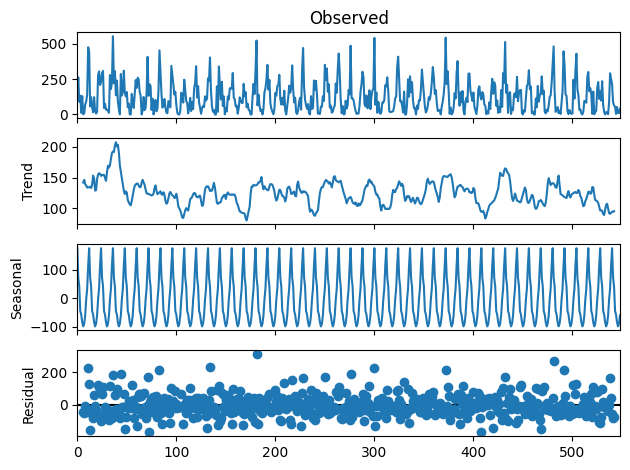

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

precipitacao_total = np.array(df_mensal[coluna_precipitacao])

result = seasonal_decompose(precipitacao_total, model='additive', period=12)
result.plot()

plt.show()

## Arquivo CSV para previsão futura

Salva arquivo CSV com dados de precipitação e temperatura média agregados mensalmente para modelegem de previsão futura.

In [31]:
df_mensal.to_csv('/content/drive/MyDrive/datasets/CRHEA/dados_crhea_agregados_mensalmente_011980_a_092025.csv')